In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
sns.set_style('dark')
sns.despine(left=True, bottom=True)

<Figure size 432x288 with 0 Axes>

As a reminder, you can get more information about the data that you were working with here: [Nashville City Cemetery Metadata](https://data.nashville.gov/api/views/diwx-fgj7/files/963c111e-2e2a-4133-a807-2becd590feb2?download=true&filename=Historic-Nashville-City-Cemetery-Interments-1846-1979-Metadata-v2.pdf).

1. Read the City Cemetery data into a pandas DataFrame. **Hint:** see the [`read_excel` function](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).


In [160]:
df = pd.read_excel('../data/Historic_Nashville_City_Cemetery_Interments__1846-1979.xlsx')
df.head()

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks
0,6B,"Bell, Nancy Ann",Aug,8.0,6.0,1979.0,F,W,10.0,NaN,NaN,Oak,"sec. 28 NW, lot 12",J. L. Hughes lot
1,6W,"Drake, Mary Edith Smith, Mrs.",May,5.0,19.0,1979.0,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of..."
2,6D,"Davis, Bessie",Sep,9.0,19.0,1979.0,F,W,90.0,Nashville,Old Age,Poplar,"McAllister, E25, lot 8",daughter of Helen Davis
3,6C,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,Nashville,NaN,sect.ion 9,15.0,Magnolia
4,6W,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,"Nashville, Tennessee",NaN,NaN,NaN,Malgnolia


2. **Most Common Causes of Death.**  
   a. Find the 10 most common (known) recorded causes of death.  
   b. Clean up some of the misspellings. Use the [`replace` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) to clean up some of the causes of death. For example, replace "Cholrea" with "Cholera" and "Still Born" with "Stillborn".   
   **Bonus (Save For Last):** One method of detecting and correcting misspellings is fuzzy matching using metrics like [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance). Check out [thefuzz](https://github.com/seatgeek/thefuzz) a library that implements fuzzy matching and apply it to detect and correct misspellings.  
   c. After correcting the spellings, find the 10 most common causes of death and create a bar chart to display your findings.  

In [162]:
df = df[df["Month No."].notna()]
df = df[df["Burial Year"].notna()]
df = df.astype({"Burial Year": 'int', 'Month No.': 'int'})
df.head()

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks
0,6B,"Bell, Nancy Ann",Aug,8,6.0,1979,F,W,10.0,NaN,NaN,Oak,"sec. 28 NW, lot 12",J. L. Hughes lot
1,6W,"Drake, Mary Edith Smith, Mrs.",May,5,19.0,1979,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of..."
2,6D,"Davis, Bessie",Sep,9,19.0,1979,F,W,90.0,Nashville,Old Age,Poplar,"McAllister, E25, lot 8",daughter of Helen Davis
3,6C,"Creech, Emily Green",Aug,8,NaN,1978,F,W,91.0,Nashville,NaN,sect.ion 9,15.0,Magnolia
4,6W,"Creech, Emily Green",Aug,8,NaN,1978,F,W,91.0,"Nashville, Tennessee",NaN,NaN,NaN,Malgnolia


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19704 entries, 0 to 19742
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Volume                 19704 non-null  object 
 1   Name                   19699 non-null  object 
 2   Burial Month           19704 non-null  object 
 3   Month No.              19704 non-null  int32  
 4   Burial Day             19687 non-null  float64
 5   Burial Year            19704 non-null  int32  
 6   Sex                    19472 non-null  object 
 7   Race                   19660 non-null  object 
 8   Age                    11065 non-null  float64
 9   Residence              19652 non-null  object 
 10  Cause of Death/Burial  19415 non-null  object 
 11  Ave                    19059 non-null  object 
 12  Section/Lot            18587 non-null  object 
 13  Remarks                16356 non-null  object 
dtypes: float64(2), int32(2), object(10)
memory usage: 2.1+

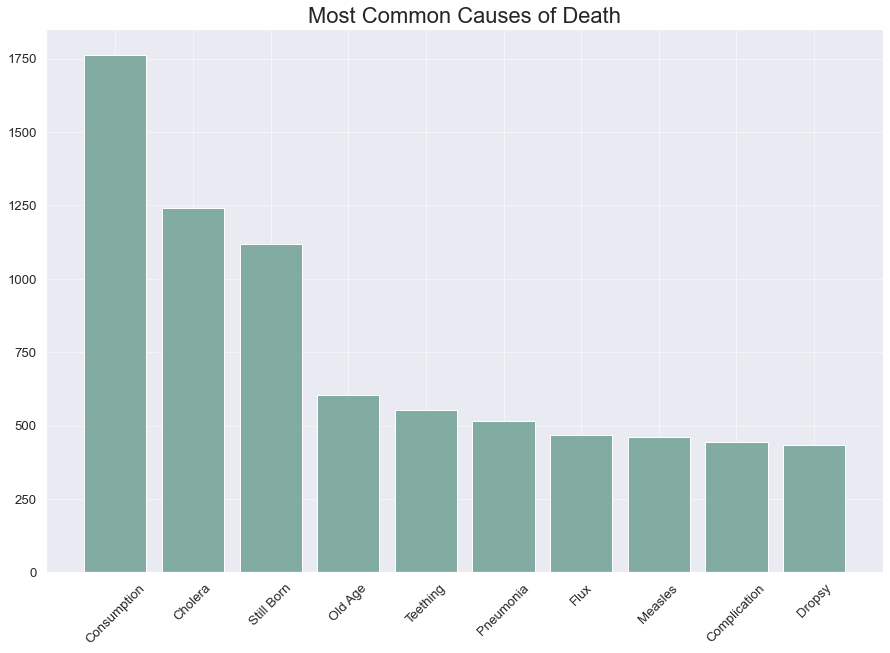

In [256]:
df_filtered = df[~df['Cause of Death/Burial'].isin(['Unknown', 'Not Known'])]
df_cleaned = df_filtered.replace(['Measels', 'Cholrea', 'Stil Born', 'Teethin', 'Dropsey', 'Feever'],
     ['Measles', 'Cholera', 'Still Born', 'Teething', 'Dropsy', 'Fever'])
causes_of_death = df_cleaned['Cause of Death/Burial'].value_counts()
cod = causes_of_death.head(10)
cod = pd.DataFrame(cod).reset_index()
plt.figure(figsize=(15, 10))
plt.bar(cod['index'], cod['Cause of Death/Burial'], color='#82ABA1')
plt.title('Most Common Causes of Death', fontsize=22)
plt.xticks(rotation=45);

3. Create a line chart showing the number of burials per year.

In [167]:
count_y = df['Burial Year'].value_counts().sort_index()
count_y.head()

1846    246
1847    476
1848    447
1849    745
1850    809
Name: Burial Year, dtype: int64

Text(0.5, 1.0, 'Count of Burials over Years')

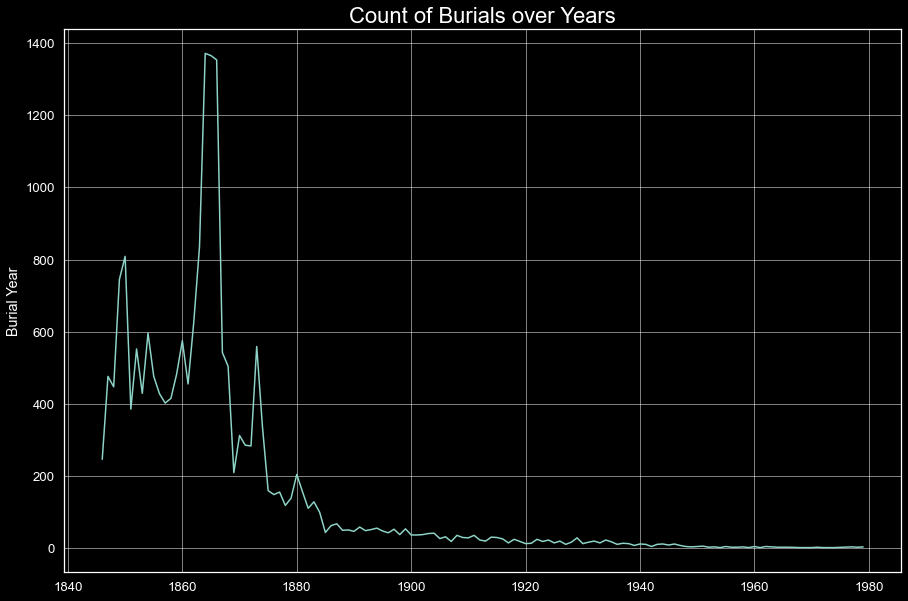

In [210]:
count_y = df['Burial Year'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(ax=ax, data = count_y)
sns.set(font_scale=1.2)
plt.title("Count of Burials over Years", fontdict={'fontsize': 22})
# plt.style.use('dark_background')


4. **Burials per Month and Year**  
    a. Use the [crosstab function](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) to build a summary table showing the number of burials per year per month. You should have one row per year and one column for month.  
    b. After creating this summary table, make sure that the year labels are integers (no decimal part) and that the columns are sorted correctly.  
    c. Filter your table to show only the years 1846 through 1860.  
    **Bonus** Display your table so that highlights any months that had over 100 burials. Hint: Look at styling in pandas: https://pandas.pydata.org/pandas-docs/version/1.0/user_guide/style.html  
    d. Go back to your original DataFrame and filter to the year and month that had the largest number of burials. What are the most common causes of death for that month?

In [211]:
df_ym = pd.crosstab(df[df['Burial Year'].isin(range(1846, 1861))]['Burial Year'], df['Month No.'])

In [212]:
def high_num_red(val):
    color = 'red' if val > 100 else 'white'
    return 'color: %s' % color

In [213]:
s = df_ym.style.applymap(high_num_red)
s

Month No.,1,2,3,4,5,6,7,8,9,10,11,12
Burial Year,,,,,,,,,,,,
1846,20,26,25,22,26,0,0,0,35,39,23,30
1847,43,34,38,35,26,47,40,61,35,47,36,34
1848,36,36,49,37,41,47,65,39,23,26,21,27
1849,46,64,64,43,62,231,96,36,28,18,24,33
1850,24,26,43,29,37,120,370,52,22,27,28,31
1851,26,31,27,29,26,37,49,35,32,42,14,37
1852,37,32,39,37,58,84,76,54,31,32,36,36
1853,35,39,35,31,36,54,47,32,34,27,28,31
1854,35,33,34,43,61,137,95,44,34,25,25,30


In [234]:
high_burial_months = df_cleaned[
    (df_cleaned["Burial Year"] == 1850) & (df_cleaned['Month No.'] == 7)
    ]
high_burial_months['Cause of Death/Burial'].value_counts().head(10)

Cholera           228
Complicated        17
Teething           12
Diarhoera           8
Consumption         7
Infl of Bowels      7
Old Age             6
Infl of Brain       6
Fever               5
Not known           3
Name: Cause of Death/Burial, dtype: int64

5. **Burials per Decade**  
    a. Create a "Decade" column to show the decade in which a burial occurred.    
    b. Examine the burials per decade. Look at the total number of burials and the proportion (aka percentage) of male burials and female burials.  
    c. Create a clustered bar chart to show how male and female burials have changed over time.

In [214]:
df['Decade'] = df['Burial Year'].astype('string').str.slice(stop=3)+"0s"
df.head()

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks,Decade
0,6B,"Bell, Nancy Ann",Aug,8,6.0,1979,F,W,10.0,NaN,NaN,Oak,"sec. 28 NW, lot 12",J. L. Hughes lot,1970s
1,6W,"Drake, Mary Edith Smith, Mrs.",May,5,19.0,1979,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of...",1970s
2,6D,"Davis, Bessie",Sep,9,19.0,1979,F,W,90.0,Nashville,Old Age,Poplar,"McAllister, E25, lot 8",daughter of Helen Davis,1970s
3,6C,"Creech, Emily Green",Aug,8,NaN,1978,F,W,91.0,Nashville,NaN,sect.ion 9,15.0,Magnolia,1970s
4,6W,"Creech, Emily Green",Aug,8,NaN,1978,F,W,91.0,"Nashville, Tennessee",NaN,NaN,NaN,Malgnolia,1970s


In [215]:
burials_per_decade_male = df[df['Sex'] == 'M'].Decade.value_counts()
burials_per_decade_male = pd.DataFrame(burials_per_decade_male)
burials_per_decade_male['Sex'] = 'Male'
burials_per_decade_female = df[df['Sex'] == 'F'].Decade.value_counts()
burials_per_decade_female = pd.DataFrame(burials_per_decade_female)
burials_per_decade_female['Sex'] = 'Female'
df_sex = pd.concat([burials_per_decade_female, burials_per_decade_male])
df_sex['year'] = df_sex.index
df_sex
# width = 0.4
# plt.figure(figsize=(15, 6))
# plt.bar(burials_per_decade_male.index, burials_per_decade_male, width)
# plt.bar((burials_per_decade_female.index)+0.2, burials_per_decade_female, width, color='pink')

,Decade,Sex,year
1860s,3744,Female,1860s
1850s,2244,Female,1850s
1870s,1226,Female,1870s
1840s,869,Female,1840s
1880s,491,Female,1880s
1890s,245,Female,1890s
1900s,167,Female,1900s
1910s,129,Female,1910s
1920s,95,Female,1920s
1930s,71,Female,1930s


Text(0.5, 1.0, 'Male Burials vs Female Burials Over Time')

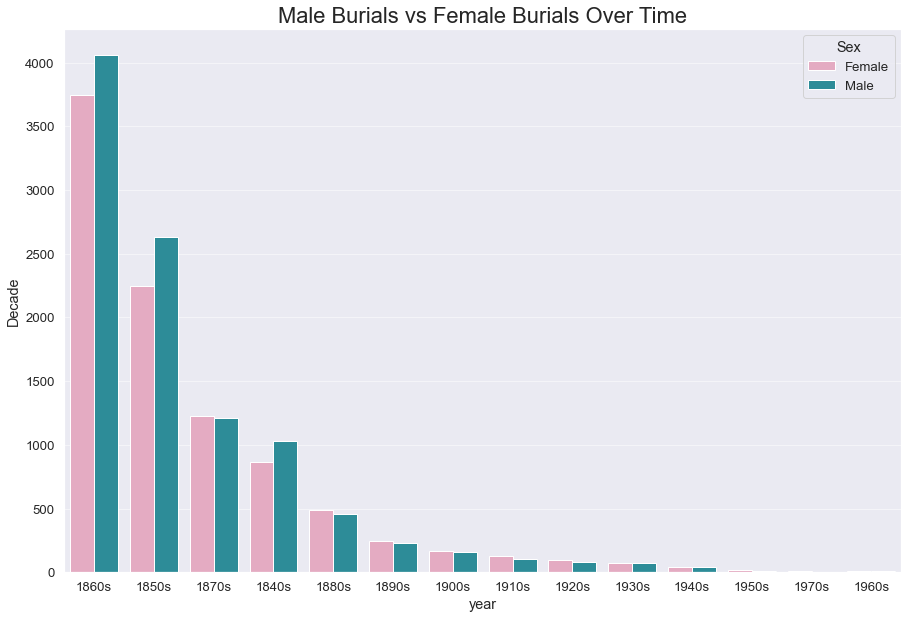

In [225]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(ax=ax, data=df_sex,
     x='year', y='Decade', hue='Sex',
     palette=['#EDA2C0', '#1B9AAA'])
plt.title("Male Burials vs Female Burials Over Time", fontdict={'fontsize': 22})

### Bonus Questions

6. **Burials per Age Group**  
    a. Add a column to the original dataset to classify each row to one of the following categories (0-18, 19-25, 26-40, 41-64, and 65+). (Hint: One way to do this is using the [`cut` function](https://pandas.pydata.org/docs/reference/api/pandas.cut.html)).  
    b. Create a "Year Group" dividing the records up based on burial year. Use the following groups: Before 1880, 1880-1900, 1901-1920, After 1920.  
    c. Use a grouped bar chart to show how the proportion of burials per age group has changed over time. How would you describe the trends in terms of proportion of burials per age group over time?

7. **Last Names**  
    a. Create a new column titled Last Name. Extract the last name from the Name column by subsetting to all characters to the left of the comma. (Hint: See the pandas [string split function](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html). When you do this, make sure to consider cases where the name does not contain a comma.  
    b. What are the most common last names that appear?

8. The Civil War ended in April, 1865, with the last full year of fighting occurring in 1864.    
   a. Create a new DataFrame, burials_1864 by subsetting the full data to the rows for 1864 burials.  
   b. For any rows whose name contains the word "infant" (capitalized or lowercase), replace the "Age" value with 0.   
   c. Create a new column called age_category. If the individual was age 0 put "Infant". If the individual was not an infant but under age 18, put "Child". Everyone aged 18 and above should be listed as "Adult".  
   d.  Find the mean age for each age group.    
   e.  Find the last infant to be buried in 1864. Two ways this could be accomplished are sorting by both the month number and burial day or by creating a date column (for example, by using the [`to_datetime` function](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) and then sorting by this date column.